In [1]:
!pip install "fastai<2.8.0"

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 136.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 813.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

In [2]:
from fastai.vision.all import *
import gradio as gr
import timm

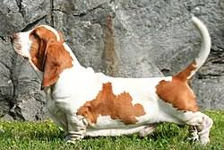

In [3]:
im = PILImage.create('/content/drive/MyDrive/Fastai Pytorch/Images/basset.jpg')
im.thumbnail((224,224))
im

In [4]:
learn = load_learner('/content/drive/MyDrive/Fastai Pytorch/Lessons/Lesson 3/model.pkl')

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [5]:
learn.predict(im)

('basset_hound',
 tensor(14),
 tensor([3.1675e-05, 6.4446e-04, 1.6101e-05, 4.0723e-06, 2.3893e-06, 1.3194e-04,
         1.9295e-05, 2.0530e-05, 5.4816e-06, 8.0881e-06, 5.6095e-06, 8.1517e-06,
         3.5507e-04, 5.8844e-04, 9.9459e-01, 3.9816e-04, 4.7761e-05, 5.6750e-07,
         4.9662e-05, 5.7721e-06, 2.9023e-04, 1.8706e-05, 1.0288e-06, 4.8662e-05,
         1.1671e-04, 9.2033e-06, 1.3464e-05, 6.7882e-06, 9.0054e-05, 8.4524e-05,
         2.3299e-03, 1.5044e-05, 1.2811e-05, 5.7735e-06, 2.7629e-06, 2.7507e-06,
         1.9613e-05]))

In [6]:
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [7]:
classify_image(im)

{'Abyssinian': 3.167475006193854e-05,
 'Bengal': 0.0006444568280130625,
 'Birman': 1.6101399523904547e-05,
 'Bombay': 4.0723411984799895e-06,
 'British_Shorthair': 2.389275095993071e-06,
 'Egyptian_Mau': 0.00013193585618864745,
 'Maine_Coon': 1.9295381207484752e-05,
 'Persian': 2.052999843726866e-05,
 'Ragdoll': 5.4816168812976684e-06,
 'Russian_Blue': 8.088057256827597e-06,
 'Siamese': 5.609452728094766e-06,
 'Sphynx': 8.151663678290788e-06,
 'american_bulldog': 0.0003550687397364527,
 'american_pit_bull_terrier': 0.0005884374841116369,
 'basset_hound': 0.9945887327194214,
 'beagle': 0.0003981590270996094,
 'boxer': 4.7760902816662565e-05,
 'chihuahua': 5.67501501791412e-07,
 'english_cocker_spaniel': 4.9662485253065825e-05,
 'english_setter': 5.772126769443275e-06,
 'german_shorthaired': 0.0002902305277530104,
 'great_pyrenees': 1.870559572125785e-05,
 'havanese': 1.0287675422659959e-06,
 'japanese_chin': 4.866218660026789e-05,
 'keeshond': 0.00011671347601804882,
 'leonberger': 9.20

In [10]:
image = gr.Image(height=192, width=192)
label = gr.Label()
examples = ['/content/drive/MyDrive/Fastai Pytorch/Images/basset.jpg']

In [11]:
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d470c1739db923ffee.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


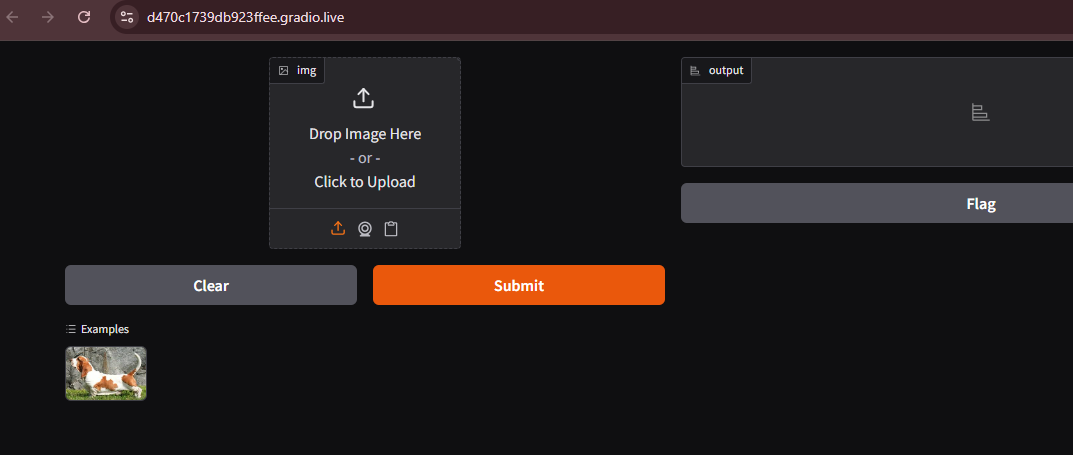

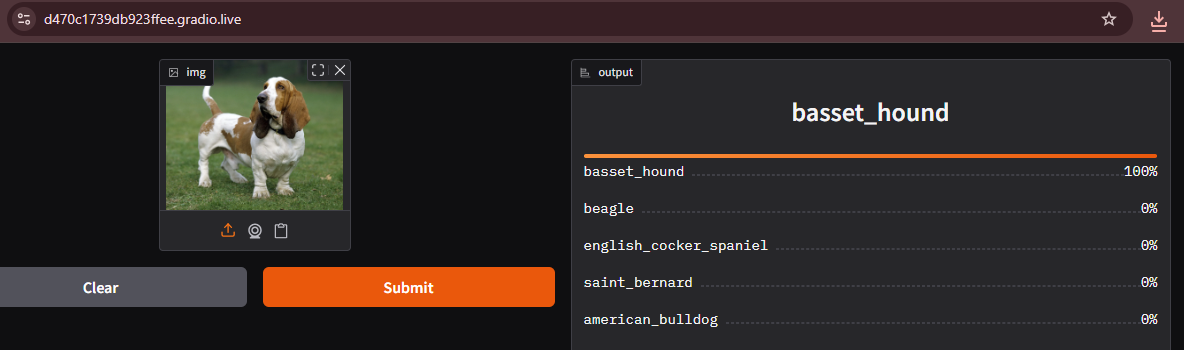

In [12]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (norm): Identity()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_path): Identity()
          

In [13]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 1.2547e+00,  1.9179e+00,  1.2201e+00,  1.0392e+00, -1.1488e-03,
          7.6577e-01,  8.8652e-01,  1.6317e+00,  7.0460e-01,  3.2894e+00,
          7.8595e-01, -1.5990e-03,  9.9938e-01, -2.7190e-03,  3.2973e+00,
         -1.8129e-04,  1.9839e+00,  1.0206e+00,  4.4530e+00,  2.5580e-01,
          2.7248e+00,  9.2663e-01,  1.2372e+00,  5.2097e-03,  1.7878e+00,
          5.4415e-01,  4.6257e+00,  1.1147e-02, -4.9437e-04,  3.4489e+00,
          1.3518e+00,  4.1252e+00,  2.6877e+00,  4.1207e+00,  3.4005e+00,
          8.4991e-01,  7.3680e-01,  3.9794e+00,  1.2850e+00,  6.4023e-01,
          2.6890e+00,  1.1176e+00,  1.1703e+00,  5.5419e-01,  2.3344e+00,
          1.4499e-03,  9.6974e-01,  2.6242e-03,  1.1980e+00,  1.7872e+00,
          4.0039e-01,  4.5174e-01,  9.7193e-01,  3.9881e+00,  6.5866e-01,
          6.8789e-01,  9.8471e-01,  2.7055e+00,  1.2170e+00,  7.6202e-01,
          3.3020e+00,  1.6207e+00,  9.5772e-01,  2.1201e+00,  6.3038e-01,
          4.034

In [14]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())

[Parameter containing:
 tensor([[ 0.0227, -0.0016,  0.0405,  ...,  0.0018, -0.0453,  0.0079],
         [-0.1439,  0.0169,  0.0258,  ...,  0.0127, -0.1044,  0.0563],
         [-0.0654, -0.0328,  0.0058,  ..., -0.0416,  0.0658, -0.0403],
         ...,
         [-0.0089,  0.0698,  0.0002,  ...,  0.0040,  0.0415, -0.0192],
         [ 0.0019,  0.0321,  0.0299,  ..., -0.0297, -0.0304,  0.0556],
         [ 0.1209, -0.0353, -0.0045,  ..., -0.0063,  0.0237, -0.0113]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.4047, -0.7420, -0.4234, -0.1651, -0.3026, -0.1900, -0.5534, -0.6271,
         -0.3007, -0.4253, -0.5995, -0.4106, -0.2173, -1.7935, -0.3170, -0.1164,
         -0.4482, -0.2847, -0.4342, -0.4945, -0.4065, -1.1402, -0.6755, -1.7236,
         -0.2955, -0.2655, -0.2187, -0.3913, -0.4149, -0.4770,  0.2366, -0.7541,
         -0.5851, -0.1821, -1.5271, -0.3624, -2.4689, -2.3461, -0.6109, -0.4114,
         -0.6963, -0.5764, -0.5877, -0.0319, -2.0355, -0.2858, -0.3953, -0.8403